In [7]:
import matplotlib.pyplot as plt
from torchvision import transforms

from data_loading import AnimalKeypointsDataset

In [8]:
image_size = (128, 128)
data = AnimalKeypointsDataset(json_file_path='../dataset/keypoints_annotations.json',
                              image_dir='../dataset/labeled/')

In [9]:
def show_keypoints(image, keypoints, show_edges=False):
    plt.imshow(image)
    if show_edges:
        # Works only with default keypoints layout (16 points, default names from labeling app entries)
        edges = [
            [0, 1, 'lightgreen'],
            [1, 2, 'lightblue'],
            [2, 3, 'lightblue'],
            [3, 4, 'lightblue'],
            [1, 5, 'green'],
            [5, 6, 'green'],
            [6, 7, 'green'],
            [1, 8, 'yellow'],
            [8, 9, 'yellow'],
            [9, 10, 'violet'],
            [10, 11, 'violet'],
            [11, 12, 'violet'],
            [9, 13, 'orange'],
            [13, 14, 'orange'],
            [14, 15, 'orange']
        ]
        for edge in edges:
            plt.plot((keypoints[edge[0], 0] * image.width, keypoints[edge[1], 0] * image.width),
                     (keypoints[edge[0], 1] * image.height, keypoints[edge[1], 1] * image.height),
                     linewidth=2,
                     c=edge[2])
    else:
        plt.scatter(keypoints[:, 0] * image.width,
                    keypoints[:, 1] * image.height,
                    s=30,
                    # marker='.',
                    edgecolors='black',
                    c=['limegreen' if vis else 'orange' for vis in keypoints[:, 2]])


0 480x281 (16, 3)
1 480x318 (16, 3)
2 480x320 (16, 3)
3 400x320 (16, 3)
4 480x320 (16, 3)
5 318x320 (16, 3)
6 825x703 (16, 3)
7 480x252 (16, 3)
8 3024x4032 (16, 3)


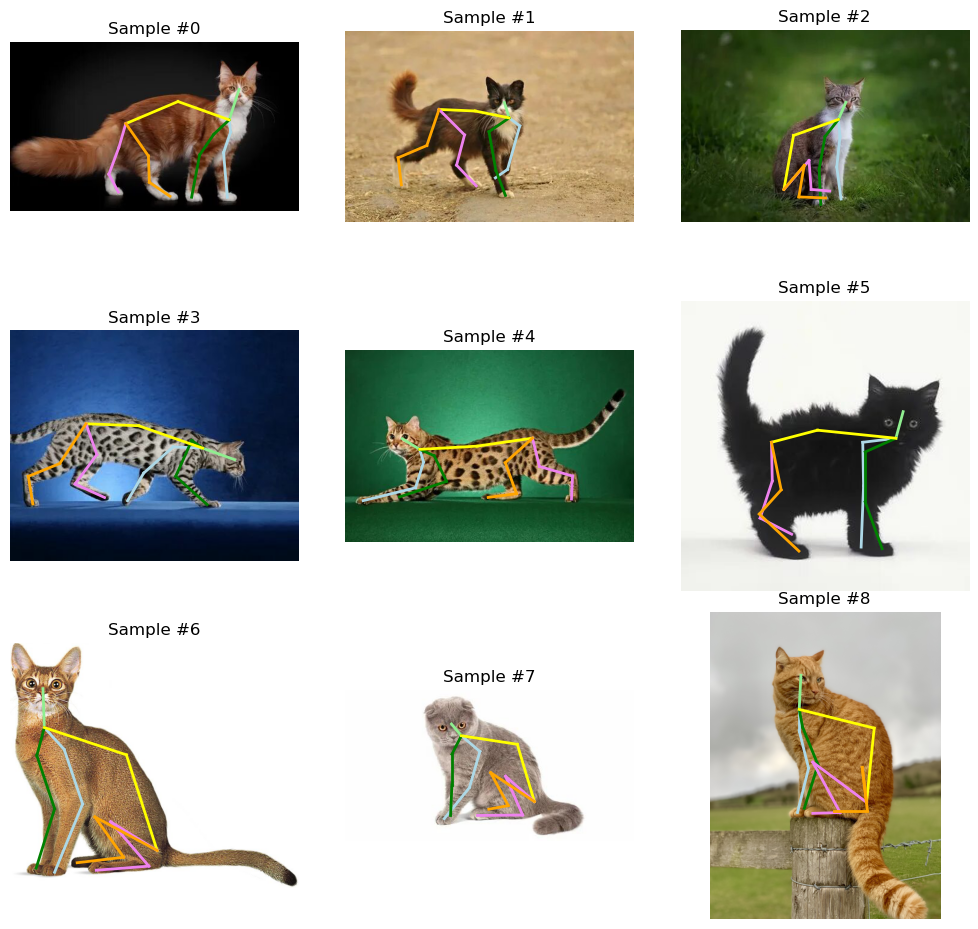

In [10]:
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]

    print(i, '{}x{}'.format(sample['image'].width, sample['image'].height),
          sample['keypoints'].shape)

    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_keypoints(sample['image'], sample['keypoints'], True)
plt.show()

In [11]:
tform = transforms.Compose([
    transforms.Resize(image_size),
    # transforms.ToTensor()
])
data = AnimalKeypointsDataset(json_file_path='../dataset/keypoints_annotations.json',
                              image_dir='../dataset/labeled/',
                              transform={'image':tform,
                                         'keypoints': transforms.ToTensor()}
                            )

tensor([[[0.7932, 0.2806, 1.0000],
         [0.7590, 0.4611, 1.0000],
         [0.7638, 0.5333, 0.0000],
         [0.7394, 0.6556, 0.0000],
         [0.7524, 0.9194, 1.0000],
         [0.7052, 0.5472, 1.0000],
         [0.6564, 0.6694, 1.0000],
         [0.6287, 0.9194, 1.0000],
         [0.5814, 0.3528, 1.0000],
         [0.4007, 0.4833, 1.0000],
         [0.3762, 0.6250, 0.0000],
         [0.3420, 0.7833, 1.0000],
         [0.3746, 0.8889, 1.0000],
         [0.4788, 0.6750, 1.0000],
         [0.4821, 0.8306, 1.0000],
         [0.5537, 0.9139, 1.0000]]])


IndexError: index 1 is out of bounds for dimension 0 with size 1

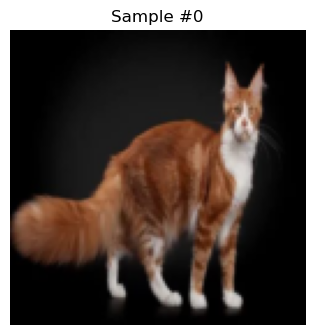

In [12]:
fig = plt.figure(figsize=(10, 10))

for i in range(9):
    sample = data[i]
    print(sample['keypoints'])
    ax = plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_keypoints(sample['image'], sample['keypoints'], True)
plt.show()

In [ ]:
# r = transforms.RandomRotation()